# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

-- The dataset analyzed in the paper "A Data-Driven Approach to Predict the Success of Bank Telemarketing" by Moro, Cortez, and Rita 
encompasses data from multiple direct marketing campaigns conducted by a Portuguese retail bank between May 2008 and June 2013. 
The dataset collected is related to **17 campaigns** that occurred between May 2008 and November 2010
Each record corresponds to a phone contact, and clients may have been contacted multiple times across different campaigns

In [5]:
# Lets import the necessary libraries 
import pandas as pd
import numpy as np
import time

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import export_text, plot_tree, export_graphviz

# Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the customer data
customer_data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [7]:
customer_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
# Lets understand the data

# Lets check if the data has any null values
customer_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# There are no null values. 

# Lets check if there are any duplicate rows
customer_data.duplicated().sum()

12

In [11]:
# There are 12 duplicate rows. Lets remove any duplicate rows
customer_data.drop_duplicates(inplace = True)

In [12]:
# As per comments "duration" should only be included for benchmark purposes and should be discarded for predictive modeling
# Lets drop the feature "duration"
customer_data.drop('duration', axis=1, inplace=True)

In [13]:
# Lets us check the summary of data to understand data
customer_data.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41176.0,NaN,NaN,NaN,40.02,10.42,17.0,32.0,38.0,47.0,98.0
job,41176,12,admin.,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41176,4,married,24921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41176,8,university.degree,12164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41176,3,no,32577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41176,3,yes,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41176,3,no,33938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41176,2,cellular,26135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41176,10,may,13767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41176,5,thu,8618,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Lets look at the unique values for each of the columns
for col in customer_data:
    print(f"{col}\n")
    print(f"{customer_data[col].unique()}\n")

age

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

job

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital

['married' 'single' 'divorced' 'unknown']

education

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default

['no' 'unknown' 'yes']

housing

['no' 'yes' 'unknown']

loan

['no' 'yes' 'unknown']

contact

['telephone' 'cellular']

month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week

['mon' 'tue' 'wed' 'thu' 'fri']

campaign

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

pdays

[999   6   4   3   5   1  

In [15]:
# The features job, marital, education, default, housing, and loan have 'unknown' Values
# feature poutcome has 'nonexistent' values

In [16]:
# Lets understand the target variable 'y'

customer_data['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [17]:
customer_data['y'].value_counts(normalize=True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

In [18]:
# This is a highly imbalanced dataset, which must be handled during modeling and choosing what evaluation metrics are used

# Lets convert the values to 0 and 1.
pd.set_option('future.no_silent_downcasting', True)
customer_data['y'] = customer_data['y'].replace({"no":0, "yes":1})

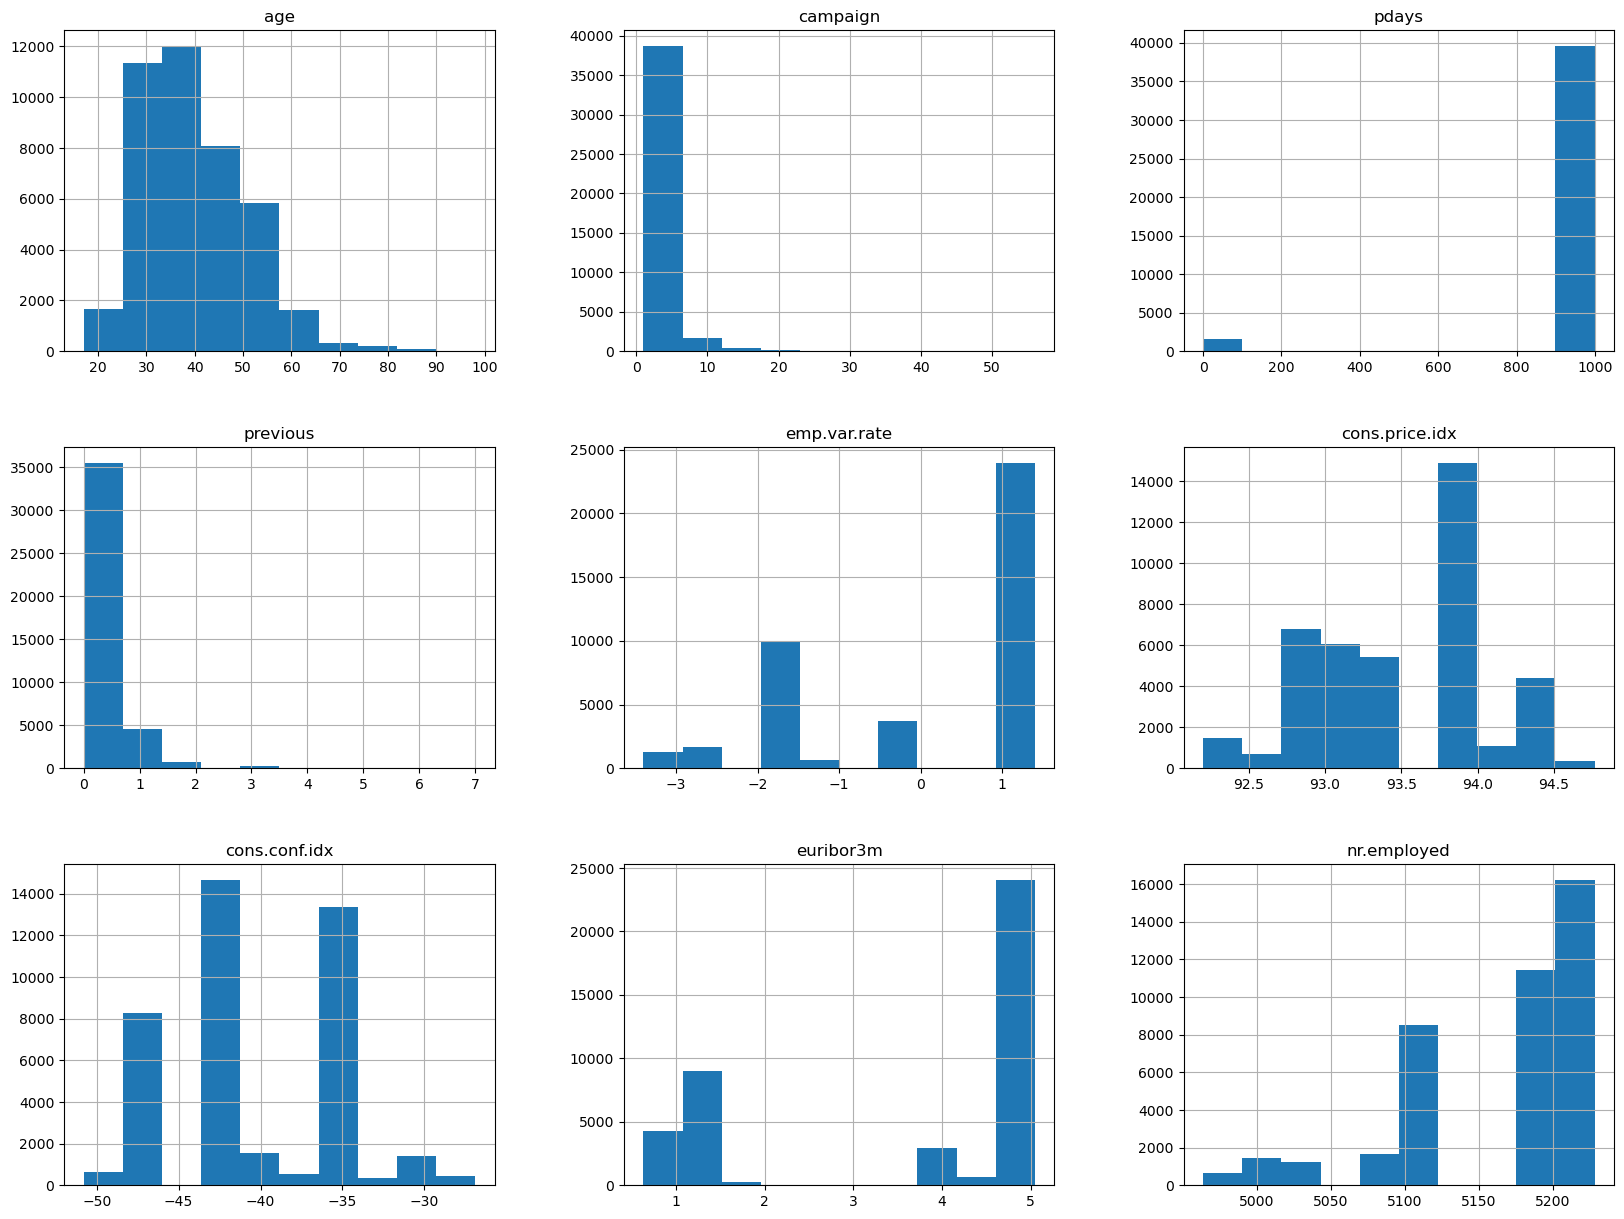

In [19]:
# Lets visualize the data distibution for each feature 
# # Now Plotting count plots for features with numeric values
customer_data.hist(figsize = (20, 15));
plt.savefig("images/histogram.png")

In [20]:
# Here are the insights from the numeric features
# 96% of values of "pdays" has value '999'. Hence this data is not useful for modeling and hence we can drop that column
customer_data.drop('pdays', axis=1, inplace=True)

In [21]:
# The % of records with "campaign" value > 24 is 0.2% and hence noise. Removing those records. 
len (customer_data[customer_data['campaign'] > 24] ) / len(customer_data) * 100
customer_data = customer_data[customer_data['campaign'] < 25]

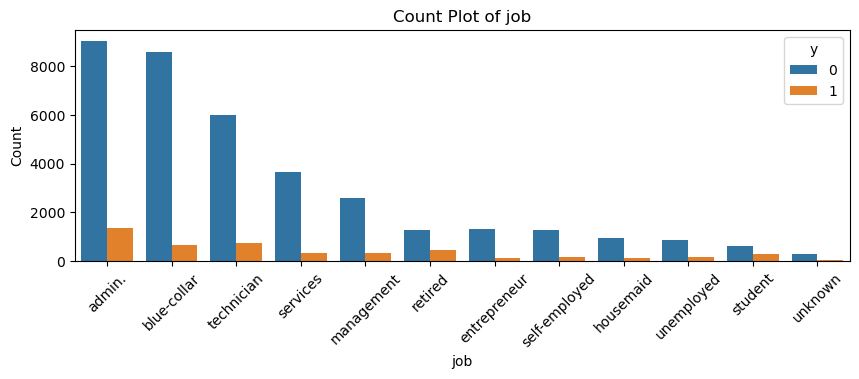

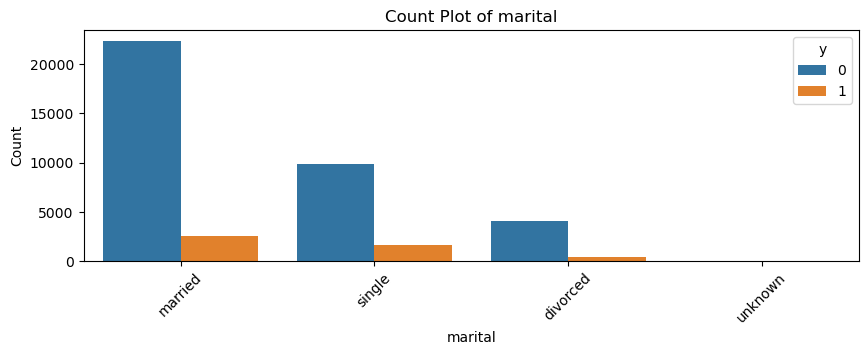

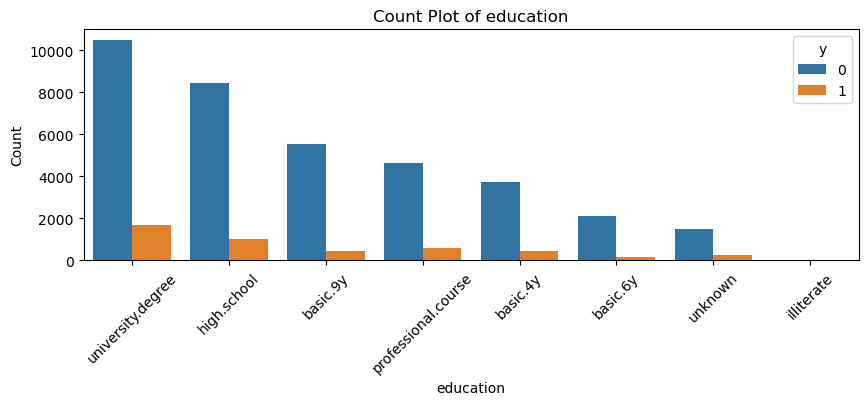

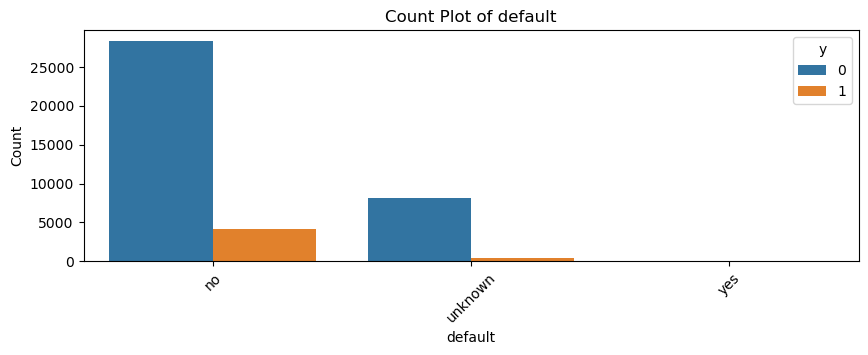

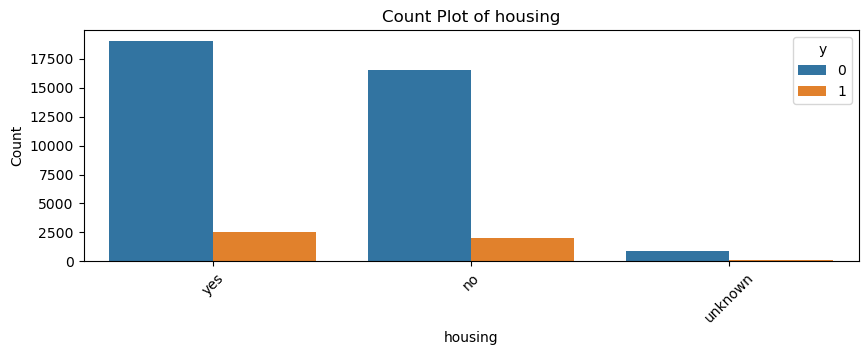

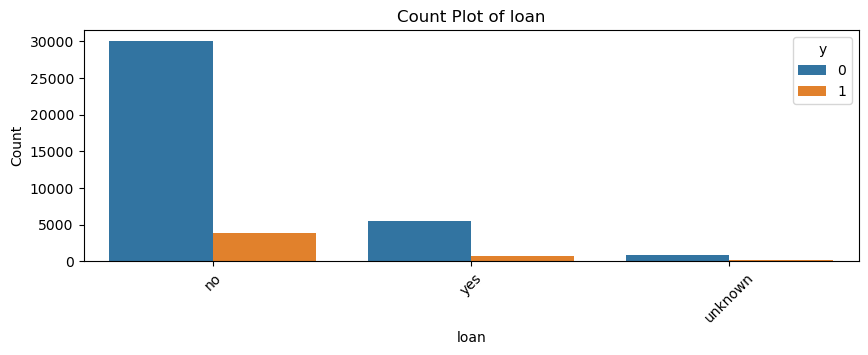

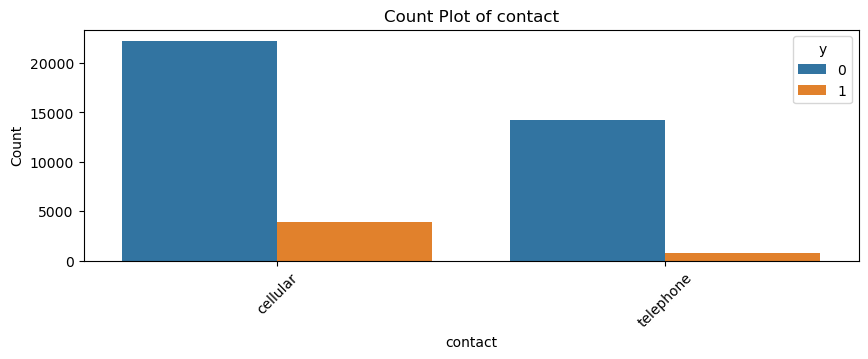

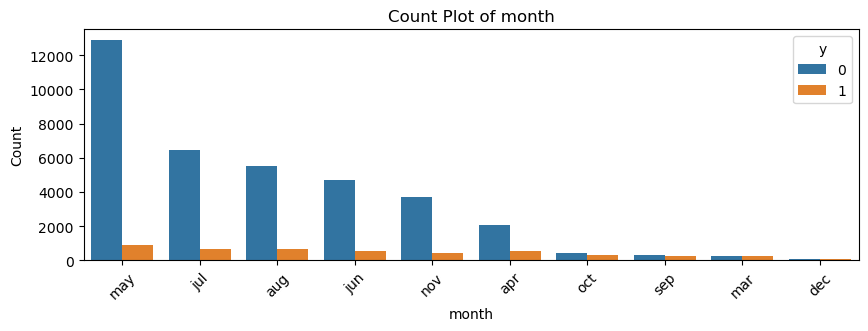

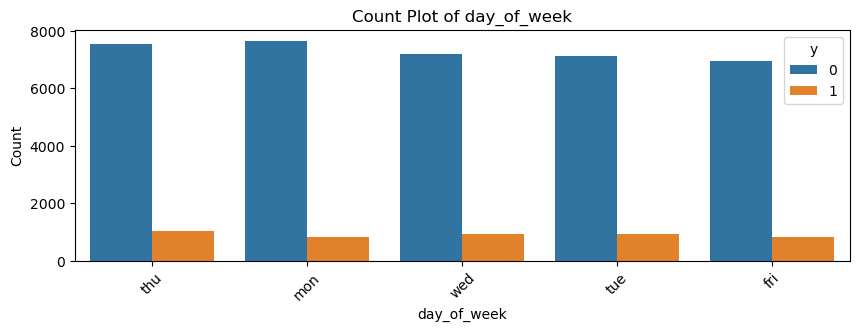

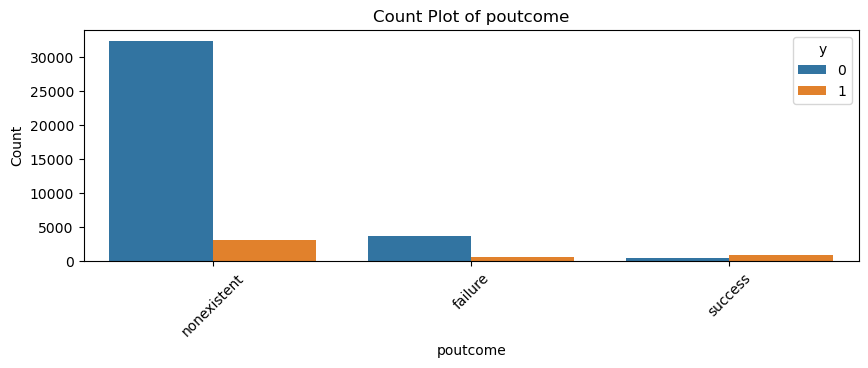

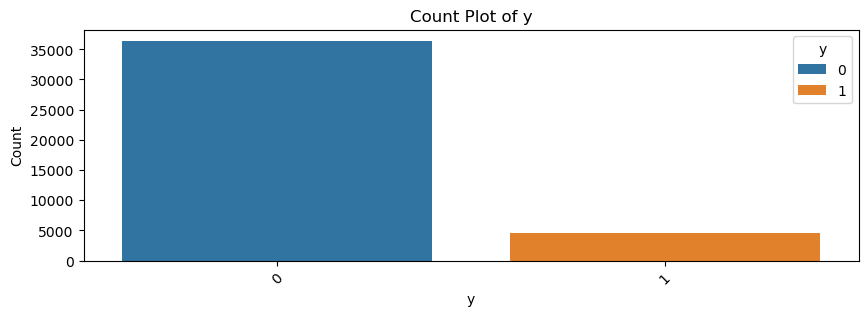

In [22]:
# Now Plotting count plots for categorical features in sorted order for each of target values 
categorical_cols = customer_data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    value_counts = customer_data[col].value_counts()
    ordered_categories = value_counts.index
    plt.figure(figsize=(10, 3))
    sns.countplot(data=customer_data, x=col, hue='y', order=ordered_categories) # Sort by count
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

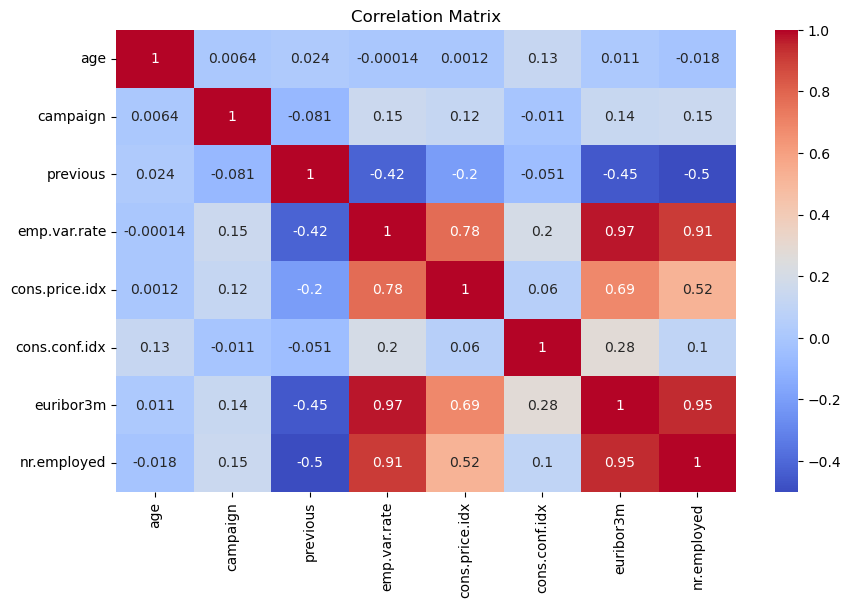

In [23]:
# Now lets understand the correlation of features
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("images/correlation.png")
plt.show()

In [24]:
# The folloing pairs have high correlation 
# pdays vs previous has -0.59
# cons.price.idx vs emp.var.rate
# cons.price.idx vs euribor3m
# euribor3m vs nr.employed

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [26]:
# The primary objective is to optimize the direct marketing efforts of the bank by accurately predicting whether a client will subscribe 
# to a long-term deposit. By achieving this, the bank can improve the efficiency of its marketing campaigns, 
# reduce costs, and enhance customer targeting, leading to higher profitability and better resource allocation.

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41091 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41091 non-null  int64  
 1   job             41091 non-null  object 
 2   marital         41091 non-null  object 
 3   education       41091 non-null  object 
 4   default         41091 non-null  object 
 5   housing         41091 non-null  object 
 6   loan            41091 non-null  object 
 7   contact         41091 non-null  object 
 8   month           41091 non-null  object 
 9   day_of_week     41091 non-null  object 
 10  campaign        41091 non-null  int64  
 11  previous        41091 non-null  int64  
 12  poutcome        41091 non-null  object 
 13  emp.var.rate    41091 non-null  float64
 14  cons.price.idx  41091 non-null  float64
 15  cons.conf.idx   41091 non-null  float64
 16  euribor3m       41091 non-null  float64
 17  nr.employed     41091 non-null  floa

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [28]:
# Split data into features (X) and target (y)
X = customer_data.drop('y',axis=1)
y = customer_data[['y']]

In [29]:
# To stop model from inadvertently learn from patterns in the test set during training, lets split data before encoding

# Lets convert the traget variable into an interger type with values 0 and 1
y['y'] = y['y'].astype(int)

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
X_train.shape, X_test.shape

((32872, 18), (8219, 18))

In [32]:
y_train.shape, y_test.shape

((32872, 1), (8219, 1))

In [33]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int','float']).columns.tolist()
cols = numerical_cols+categorical_cols
cols

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [34]:
# Lets preprocess the with appropriate encoding of the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)
    ])

In [35]:
X1_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=cols)

In [36]:
X1_train.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.155688,0.611093,-0.351458,-1.193895,-0.860873,-1.423286,-1.272395,-0.935207,2.0,0.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0
1,-0.287459,-0.206550,-0.351458,0.650696,0.724733,0.885965,0.714071,0.334433,3.0,1.0,0.0,1.0,2.0,2.0,1.0,6.0,0.0,1.0
2,-0.960927,3.064024,-0.351458,0.841516,1.537378,-0.279451,0.719253,0.846986,0.0,1.0,3.0,0.0,2.0,0.0,1.0,4.0,3.0,1.0
3,0.674639,1.019915,-0.351458,0.841516,0.593606,-0.473687,0.779135,0.846986,0.0,1.0,3.0,1.0,0.0,2.0,1.0,3.0,2.0,1.0
4,0.097380,-0.206550,-0.351458,0.841516,1.537378,-0.279451,0.774528,0.846986,9.0,1.0,5.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0


In [37]:
X1_test = pd.DataFrame(preprocessor.transform(X_test),columns=cols)

In [38]:
X1_test.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.155688,-0.206550,-0.351458,0.650696,0.724733,0.885965,0.716374,0.334433,0.0,2.0,2.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0
1,-0.287459,-0.206550,-0.351458,-1.193895,-1.174889,-1.229050,-1.307518,-0.935207,7.0,0.0,3.0,1.0,0.0,0.0,0.0,6.0,3.0,1.0
2,0.482220,-0.615372,-0.351458,0.841516,1.537378,-0.279451,0.771650,0.846986,9.0,2.0,5.0,1.0,2.0,2.0,1.0,4.0,2.0,1.0
3,-0.479878,-0.206550,-0.351458,0.650696,0.724733,0.885965,0.716374,0.334433,9.0,1.0,6.0,0.0,2.0,0.0,1.0,6.0,0.0,1.0
4,1.444317,0.611093,-0.351458,0.650696,0.724733,0.885965,0.714071,0.334433,0.0,0.0,6.0,0.0,2.0,0.0,1.0,6.0,2.0,1.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [40]:
# As stated above, Encoding can introduce data leakage if done on the full dataset before splitting. Hence data was split before encoding

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [42]:
# Lets create a Random Classifier
random_clf = DummyClassifier(strategy="uniform")
random_clf.fit(X1_train, y_train)

# Make predictions
y_pred = random_clf.predict(X1_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Classifier Accuracy:", round(accuracy,2))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Classifier Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.89      0.51      0.65      7291
           1       0.12      0.52      0.19       928

    accuracy                           0.51      8219
   macro avg       0.51      0.52      0.42      8219
weighted avg       0.81      0.51      0.60      8219

[[3740 3551]
 [ 446  482]]


In [43]:
# The Random Calssifier has an accuarcy of 0.5

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [45]:
# Lets create a Logistic Regression model
# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model on training data
log_reg.fit(X1_train, y_train)

# Make predictions on test data
y_pred = log_reg.predict(X1_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred),2)*100)
print("Logistic Regression Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 90.0
Logistic Regression Confusion Matrix:
 [[7194   97]
 [ 736  192]]


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [49]:
# Initialize models Logistic Regression, KNN algorithm, Decision Tree, and SVM models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)
}

In [50]:
# Train and evaluate all models
results = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X1_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    train_accuracy = model.score(X1_train, y_train)
    test_accuracy = model.score(X1_test, y_test)
    
    y_pred = model.predict(X1_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_prob = model.predict_proba(X1_test)[:, 1]  # Probability of the positive class
    auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'Model': name,
        'Training Time': train_time,
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'precision':precision,
        'recall': recall,
        'f1': f1,
        'AUC': auc,
        'y_pred': y_pred,
        'y_prob': y_prob
    }


In [51]:
results_df = pd.DataFrame(results).transpose().reset_index(drop=True)

In [52]:
results_df

,Model,Training Time,Training Accuracy,Test Accuracy,precision,recall,f1,AUC,y_pred,y_prob
0,Logistic Regression,0.162565,0.899976,0.898649,0.66436,0.206897,0.31553,0.7939,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.059057341677402515, 0.09373899822627679, 0...."
1,KNN,0.005985,0.91044,0.892688,0.550885,0.268319,0.36087,0.722047,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, ..."
2,Decision Tree,0.123669,0.995102,0.838301,0.309229,0.350216,0.328449,0.628877,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,SVM,192.778647,0.898911,0.897919,0.67451,0.185345,0.290786,0.714657,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0916417227357605, 0.09145826144427158, 0.09..."


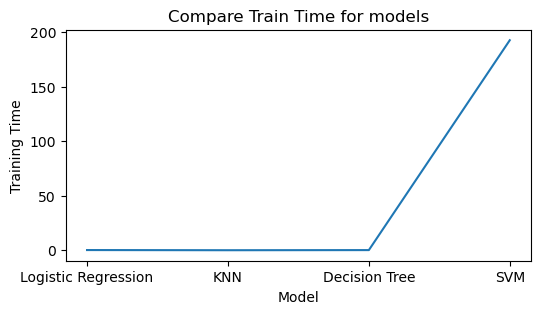

In [53]:
plt.figure(figsize=(6,3))
sns.lineplot(results_df, x='Model', y='Training Time')
plt.title('Compare Train Time for models')
plt.show()

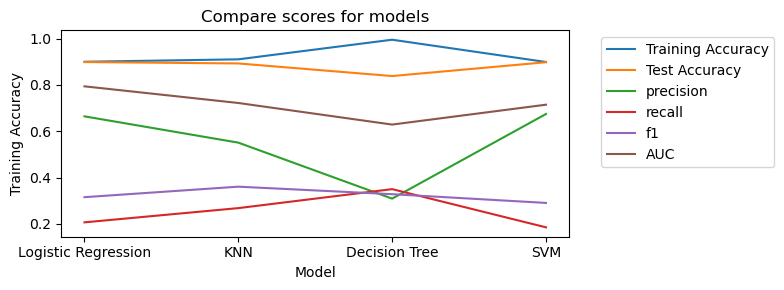

In [54]:
# Define the metrics to plot
metrics = ['Training Accuracy', 'Test Accuracy', 'precision', 'recall', 'f1', 'AUC']
plt.figure(figsize=(8,3))

# Plot each metric
for metric in metrics:
    sns.lineplot(data=results_df, x='Model', y=metric, label=metric)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Compare scores for models')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.savefig("images/Init_compare_models.png")
plt.show()

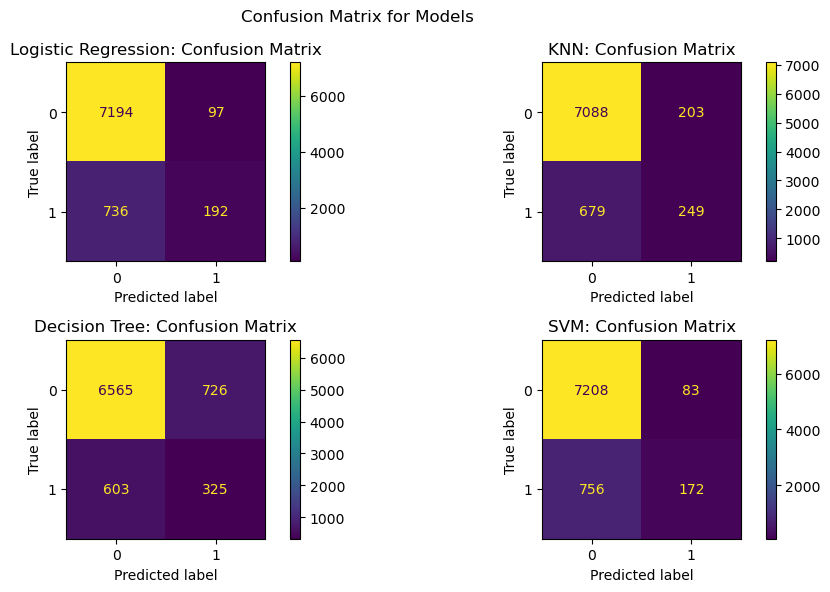

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Create a 2x2 grid of subplots
fig.suptitle('Confusion Matrix for Models')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for index, row in results_df.iterrows():
    model = row['Model']
    y_pred = row['y_pred']  # Use lowercase 'd' for predicted labels

    # Access current subplot based on counter
    ax = axes.flat[plot_count]  # Flattened array for easier access

    # Visualizing Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"{model}: Confusion Matrix")

    plot_count += 1

# Adjust layout to prevent overlapping elements (optional)
plt.tight_layout()
plt.savefig("images/Init_confusion_matrix_models.png")
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [57]:
# Lets find the best parameters for Logistic Regression 

logreg = LogisticRegression(max_iter=1000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1,10,100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

logreg_grid = GridSearchCV(logreg, param_grid=logreg_params, cv=5, scoring='accuracy')

start_time = time.time()
logreg_grid.fit(X1_train, y_train)
end_time = time.time()

logreg_execution_time = end_time - start_time

logreg_grid_best_params = logreg_grid.best_params_
logreg_grid_train_score = logreg_grid.score(X1_train, y_train)
logreg_grid_test_score = logreg_grid.score(X1_test, y_test)

print('logreg_grid_best_params: ', logreg_grid_best_params)
print('logreg_grid_train_score: ', round(logreg_grid_train_score,2))
print('logreg_grid_test_score: ', round(logreg_grid_test_score,2))
print('logreg_execution_time: ', round(logreg_execution_time,2), 's')


logreg_grid_best_params:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
logreg_grid_train_score:  0.9
logreg_grid_test_score:  0.9
logreg_execution_time:  35.3 s


In [58]:
y_pred_logreg = logreg_grid.best_estimator_.predict(X1_test)

logreg_precision_score = precision_score(y_test, y_pred_logreg)
logreg_recall_score = recall_score(y_test, y_pred_logreg)
logreg_f1_score = f1_score(y_test, y_pred_logreg)

print('logreg_precision_score: ', round(logreg_precision_score,2))
print('logreg_recall_score: ', round(logreg_recall_score,2))
print('logreg_f1_score: ', round(logreg_f1_score,2))

print(classification_report(y_test, y_pred_logreg))


logreg_precision_score:  0.66
logreg_recall_score:  0.21
logreg_f1_score:  0.31
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7291
           1       0.66      0.21      0.31       928

    accuracy                           0.90      8219
   macro avg       0.79      0.60      0.63      8219
weighted avg       0.88      0.90      0.87      8219



In [59]:
y_prob_logreg = logreg_grid.best_estimator_.predict_proba(X1_test)[:, 1]
auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f"AUC = {auc_logreg:.2f}")

AUC = 0.79


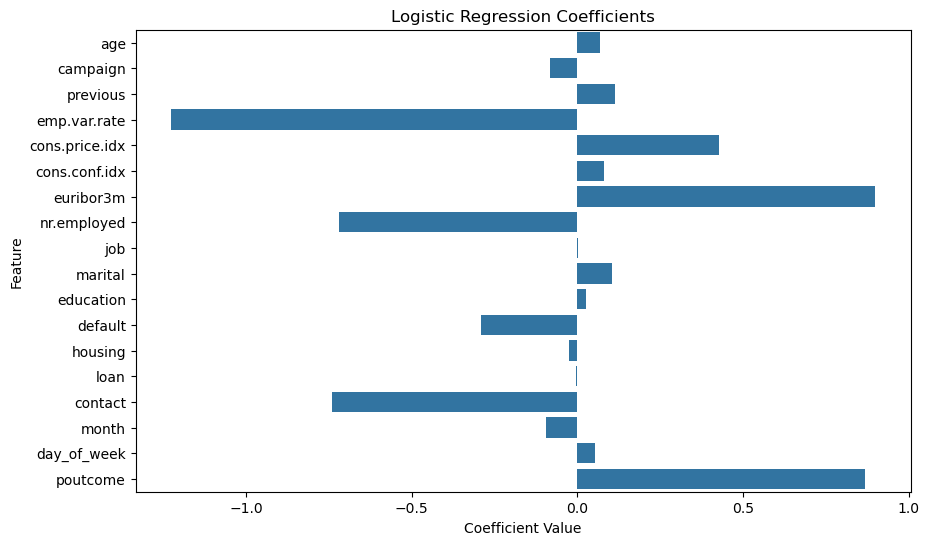

In [60]:

coefficients = logreg_grid.best_estimator_.coef_[0]
intercept = logreg_grid.best_estimator_.intercept_[0]

# Create a DataFrame to display the coefficients along with their feature names
coeff_df = pd.DataFrame({
    'Feature': cols,
    'Coefficient': coefficients
})

# Plotting the coefficients using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [61]:
# Next lets look at Decision Trees 

dtree = DecisionTreeClassifier()
dtree_params = {
    'max_depth': [None, 2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dtree_grid = GridSearchCV(dtree, param_grid=dtree_params, cv=5, scoring='accuracy')
start_time = time.time()
dtree_grid.fit(X1_train, y_train)
end_time = time.time()

dtree_execution_time = end_time - start_time
dtree_grid_best_params = dtree_grid.best_params_
dtree_grid_train_score = dtree_grid.score(X1_train, y_train)
dtree_grid_test_score = dtree_grid.score(X1_test, y_test)
print('dtree_grid_best_params: ', dtree_grid_best_params)
print('dtree_grid_train_score: ', round(dtree_grid_train_score,2))
print('dtree_grid_test_score: ', round(dtree_grid_test_score,2))
print('dtree_execution_time: ', round(dtree_execution_time,2), 's')

dtree_grid_best_params:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
dtree_grid_train_score:  0.9
dtree_grid_test_score:  0.9
dtree_execution_time:  28.59 s


In [62]:
y_pred_dtree = dtree_grid.best_estimator_.predict(X1_test)
dtree_precision_score = precision_score(y_test, y_pred_dtree)
dtree_recall_score = recall_score(y_test, y_pred_dtree)
dtree_f1_score = f1_score(y_test, y_pred_dtree)
print('dtree_precision_score: ', round(dtree_precision_score,2))
print('dtree_recall_score: ', round(dtree_recall_score,2))
print('dtree_f1_score: ', round(dtree_f1_score,2))
print(classification_report(y_test, y_pred_dtree))

dtree_precision_score:  0.67
dtree_recall_score:  0.27
dtree_f1_score:  0.38
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7291
           1       0.67      0.27      0.38       928

    accuracy                           0.90      8219
   macro avg       0.79      0.63      0.67      8219
weighted avg       0.89      0.90      0.88      8219



In [63]:
y_prob_dtree = dtree_grid.best_estimator_.predict_proba(X1_test)[:, 1]
auc_dtree = roc_auc_score(y_test, y_prob_dtree)
print(f"AUC = {auc_dtree:.2f}")

AUC = 0.79


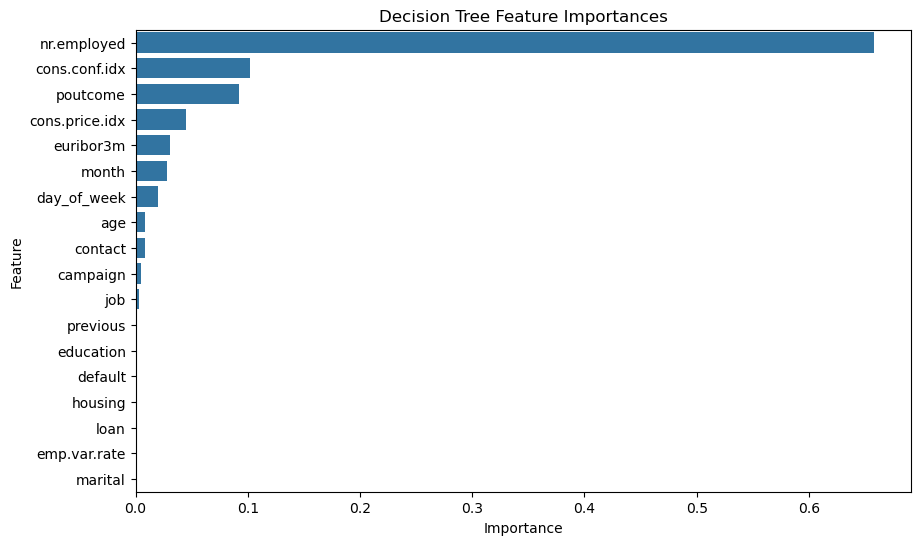

In [64]:
# Retrieve the feature importances
importances = dtree_grid.best_estimator_.feature_importances_
cols = numerical_cols+categorical_cols
# Create a DataFrame to display the feature importances along with their feature names
importances_df_dtree = pd.DataFrame({
    'Feature': cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df_dtree)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [65]:
# Extract and display the decision rules
tree_rules = export_text(dtree_grid.best_estimator_, feature_names=cols)
print(tree_rules)

|--- nr.employed <= -1.09
|   |--- poutcome <= 1.50
|   |   |--- contact <= 0.50
|   |   |   |--- cons.price.idx <= -0.70
|   |   |   |   |--- euribor3m <= -1.66
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- euribor3m >  -1.66
|   |   |   |   |   |--- class: 0
|   |   |   |--- cons.price.idx >  -0.70
|   |   |   |   |--- poutcome <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- poutcome >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- contact >  0.50
|   |   |   |--- month <= 0.50
|   |   |   |   |--- previous <= 0.66
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- previous >  0.66
|   |   |   |   |   |--- class: 1
|   |   |   |--- month >  0.50
|   |   |   |   |--- nr.employed <= -2.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- nr.employed >  -2.30
|   |   |   |   |   |--- class: 0
|   |--- poutcome >  1.50
|   |   |--- nr.employed <= -1.62
|   |   |   |--- day_of_week <= 1.50
|   |   |   |   |--- campaign <= 1.63
|   |   |   |   |   |--

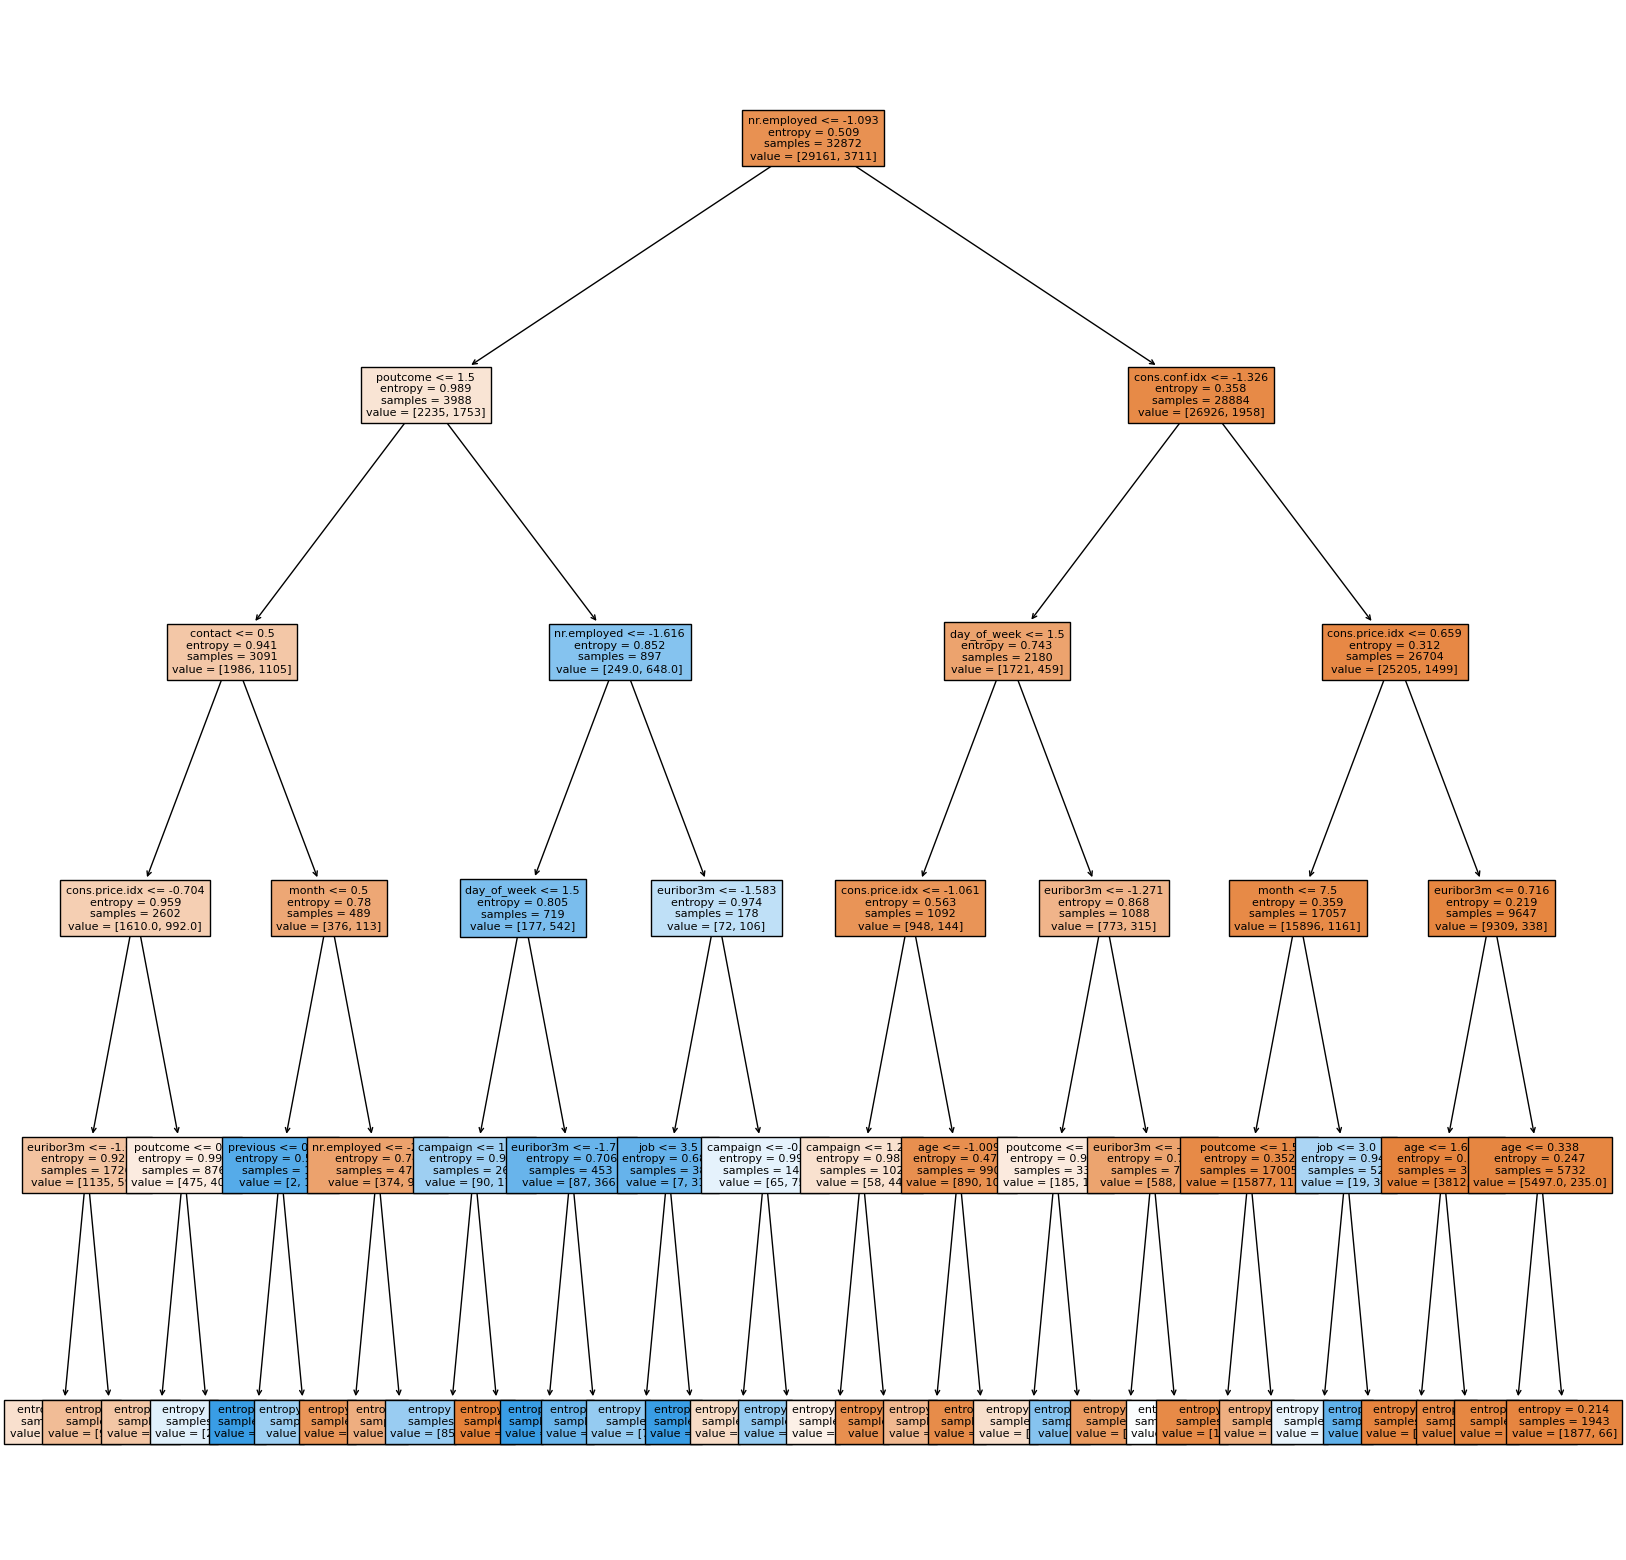

In [66]:
# Visualize the tree below with the feature names and nodes colored


fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(dtree_grid.best_estimator_, feature_names=cols, filled=True, ax = ax, fontsize=8);
plt.savefig('images/tree.jpg',format='jpg',bbox_inches = "tight")


In [67]:
# Next, Lets look at K-Nearest Neighbors model

knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 22, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_grid = GridSearchCV(knn, param_grid=knn_params, cv=5, scoring='accuracy')
start_time = time.time()
knn_grid.fit(X1_train, y_train)
end_time = time.time()
knn_execution_time = end_time - start_time

knn_grid_best_params = knn_grid.best_params_
knn_grid_train_score = knn_grid.score(X1_train, y_train)
knn_grid_test_score = knn_grid.score(X1_test, y_test)
print('knn_grid_best_params: ', knn_grid_best_params)
print('knn_grid_train_score: ', round(knn_grid_train_score,2))
print('knn_grid_test_score: ', round(knn_grid_test_score,2))
print('knn_execution_time: ', round(knn_execution_time,2), 's')

knn_grid_best_params:  {'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
knn_grid_train_score:  0.91
knn_grid_test_score:  0.9
knn_execution_time:  156.6 s


In [68]:
y_pred_knn = knn_grid.best_estimator_.predict(X1_test)
knn_precision_score = precision_score(y_test, y_pred_knn)
knn_recall_score = recall_score(y_test, y_pred_knn)
knn_f1_score = f1_score(y_test, y_pred_knn)
print('knn_precision_score: ', round(knn_precision_score,2))
print('knn_recall_score: ', round(knn_recall_score,2))
print('knn_f1_score: ', round(knn_f1_score,2))
print(classification_report(y_test, y_pred_knn))

knn_precision_score:  0.62
knn_recall_score:  0.25
knn_f1_score:  0.35
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7291
           1       0.62      0.25      0.35       928

    accuracy                           0.90      8219
   macro avg       0.77      0.61      0.65      8219
weighted avg       0.88      0.90      0.88      8219



In [69]:
y_prob_knn = knn_grid.best_estimator_.predict_proba(X1_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"AUC = {auc_knn:.2f}")

AUC = 0.77


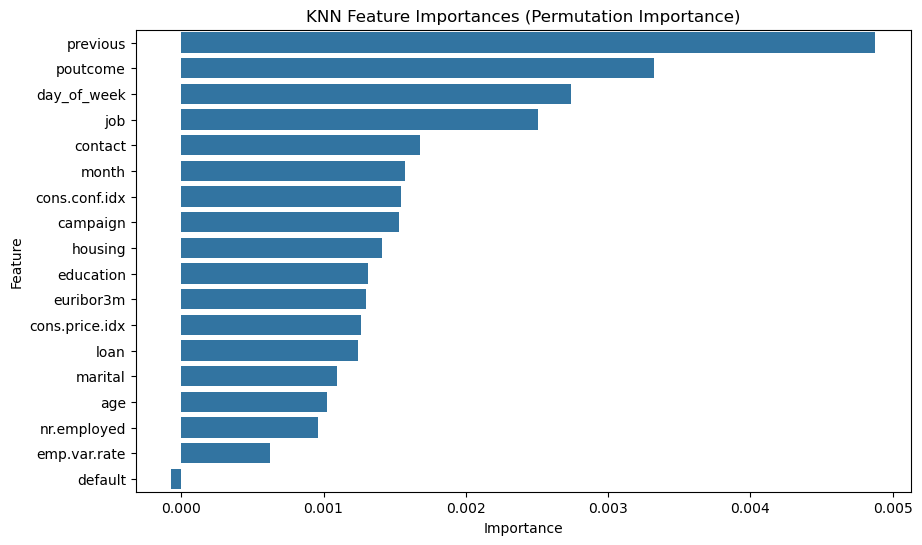

In [70]:
# Compute permutation feature importance

result = permutation_importance(knn_grid.best_estimator_, X1_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame to display the feature importances along with their feature names
knn_importances_df = pd.DataFrame({
    'Feature': cols,
    'Importance': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_importances_df)
plt.title('KNN Feature Importances (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [71]:
# #Fianlly SVM 
# kernels = ['rbf', 'poly', 'linear', 'sigmoid']
# cv_scores = []
# for k in kernels:
#     svc = SVC(kernel=k)
#     scores = cross_val_score(svc, X1_train, y_train, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())

# optimal_kernel = kernels[cv_scores.index(max(cv_scores))]

# svm = SVC(probability=True)
# svm_params = {
#     'kernel': [optimal_kernel],
#     'C': [0.1, 1, 10],
#     'gamma': [1, 0.1]
# }
# svm_grid = GridSearchCV(svm, param_grid=svm_params, cv=5, scoring='accuracy').fit(X1_train, y_train)



In [72]:
# best_kernel = svm_grid.best_params_['kernel']
# print(best_kernel)  

In [73]:
# SVM is computationally very expensive at this point, unable to fit the model in the local system with all the data and features.

In [74]:
results_df_improved = ''
res_dict = {
    'Model': ['Logistic Regression', 'Decision Trees', 'KNN'],
    'Train Time': [logreg_execution_time, dtree_execution_time, knn_execution_time],
    'Train Accuracy': [logreg_grid_train_score, dtree_grid_train_score, knn_grid_train_score],
    'Test Accuracy': [logreg_grid_test_score, dtree_grid_test_score, knn_grid_test_score],
    'Precision': [logreg_precision_score, dtree_precision_score, knn_precision_score],
    'Recall': [logreg_recall_score, dtree_recall_score, knn_recall_score],
    'F1': [logreg_f1_score, dtree_f1_score, knn_f1_score],
    'AUC': [auc_logreg, auc_dtree, auc_knn],
    'y_pred': [y_pred_logreg, y_pred_dtree, y_pred_knn],
    'y_prob': [y_prob_logreg, y_prob_dtree, y_prob_knn]
}
results_df_improved = pd.DataFrame(res_dict)

results_df_improved


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC,y_pred,y_prob
0,Logistic Regression,35.299850,0.900006,0.898528,0.663194,0.205819,0.314145,0.793815,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0594720730463016, 0.09366839598043827, 0.03..."
1,Decision Trees,28.589092,0.902288,0.902300,0.665782,0.270474,0.384674,0.788753,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.033968090581574885, 0.06464239117542403, 0...."
2,KNN,156.604583,0.905877,0.897798,0.619565,0.245690,0.351852,0.765578,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.07692307692307693, 0.0, 0.0, 0.0, 0.0, 0.23..."


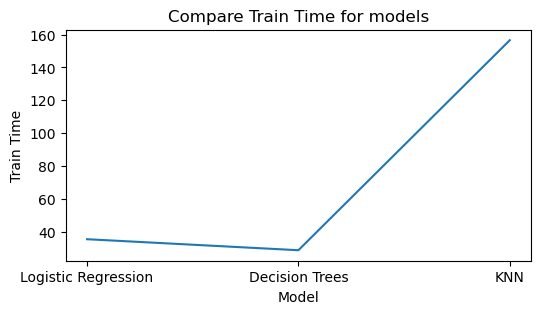

In [75]:
# Compare Train Time for models

plt.figure(figsize=(6,3))
sns.lineplot(results_df_improved, x='Model', y='Train Time')
plt.title('Compare Train Time for models')
plt.show()


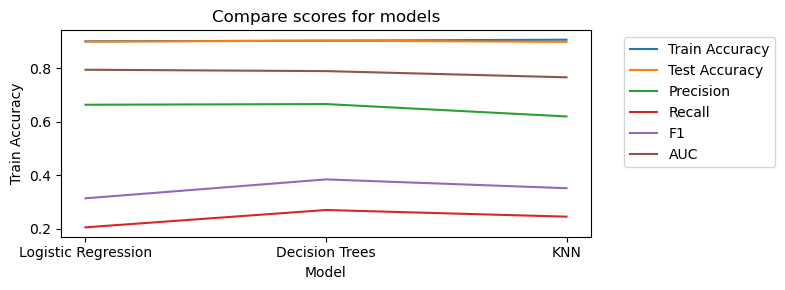

In [76]:
# Compare scores for models

# Define the metrics to plot
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
plt.figure(figsize=(8,3))

# Plot each metric
for metric in metrics:
    sns.lineplot(data=results_df_improved, x='Model', y=metric, label=metric)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Compare scores for models')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()



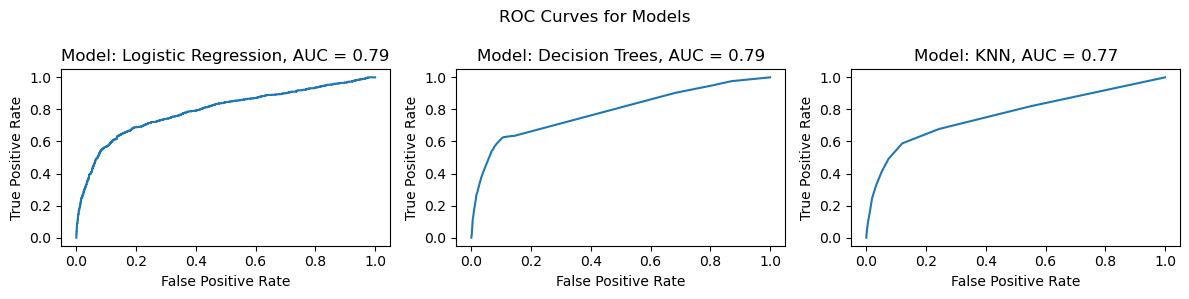

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # Create a 2x2 grid of subplots
fig.suptitle('ROC Curves for Models')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for index, row in results_df_improved.iterrows():
    model = row['Model']
    y_prob = row['y_prob']

    # Access current subplot based on counter
    ax = axes.flat[plot_count]  # Flattened array for easier access
    
    # Visualizing ROC Curve

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    ax.plot(fpr, tpr)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f"Model: {model}, AUC = {round(row['AUC'],2)}")

    plot_count += 1

# Adjust layout to prevent overlapping elements (optional)
plt.tight_layout()

plt.show()

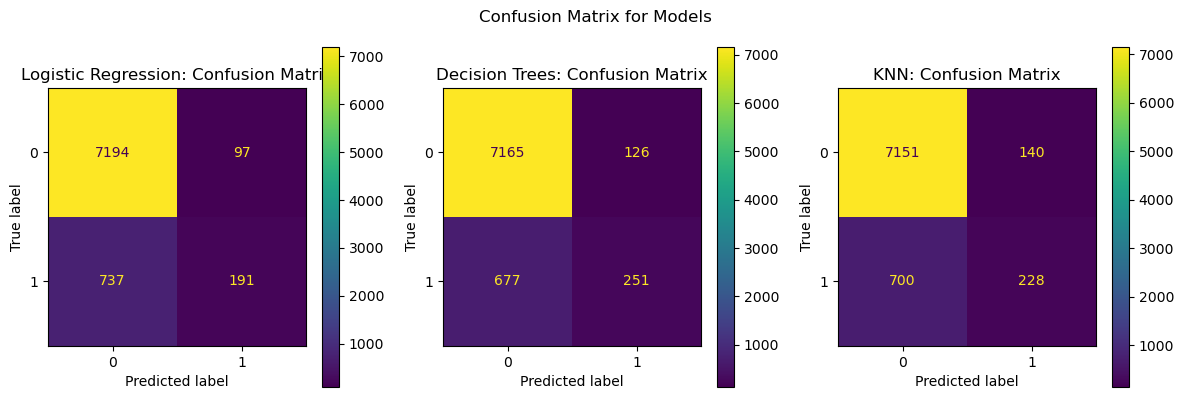

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Create a 2x2 grid of subplots
fig.suptitle('Confusion Matrix for Models')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for index, row in results_df_improved.iterrows():
    model = row['Model']
    y_pred = row['y_pred']  # Use lowercase 'd' for predicted labels

    # Access current subplot based on counter
    ax = axes.flat[plot_count]  # Flattened array for easier access

    # Visualizing Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"{model}: Confusion Matrix")

    plot_count += 1

# Adjust layout to prevent overlapping elements (optional)
plt.tight_layout()
plt.show()


In [79]:
# Decision Tree has best Performance, AUC comparable to Logistic Regression at 0.90 and best F1 at 0.57.
# Training time is much less as compared to computationally expensive KNN and SVM
# The model can be further improved but at this time Decision Tree is the best model

In [80]:
# Based on decision tree nodes, when there is low employement, customers are less likely to subscribe
# When there is more employment and favourable economic conditions  customers are more likely to subscribe

##### Questions